## Linear Regression and RANSAC

In [1]:
# Load the modules we need
import numpy as np
import random
from numpy.linalg import inv
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets

In [2]:
#  Create some intial data
n_samples = 1000

X, y = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      random_state=0)

In [3]:
# Add some outlier data
np.random.seed(0)
n_outliers = 50
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

In [4]:
# Create some test positions for for the lines we will draw
line_X = np.arange(X.min(), X.max())[:, np.newaxis]

In [5]:
# This is the cell you need to replace to complete Task 2.
# Fit line using all data.
 #Linear Regression
def bestFit(XData, yData):
    alpha = 0
    beta = 0
    gamma = 0
    delta = 0

    for ix, x in enumerate(XData):
        alpha = alpha + XData[ix]*yData[ix]
        beta = beta + XData[ix]*XData[ix]
        gamma = gamma + XData[ix]
        delta = delta + yData[ix]

    print(alpha)
    print(beta)
    print(gamma)
    print(delta)
    n = len(XData)
    print(n)

    a = np.matrix([[beta,gamma],[gamma,n]],dtype='float')
    b = np.matrix([[alpha],[delta]],dtype='float')
    o = inv(a)*b

    m=o[0][0]
    c=o[1][0]
    print(o)
    print(m)
    print(c)
    return m,c

#Calculate equation of line
equation = bestFit(X,y)
line_y = line_X.dot(equation[0])
for ly in line_y:
    ly=ly+equation[1]


[75479.19544988]
[1412.97785864]
[113.72007312]
-3205.981248354341
1000
[[54.17236387]
 [-9.36646643]]
[[54.17236387]]
[[-9.36646643]]


In [6]:
# This is the cell you need to replace to complete Task 3.
# Robustly fit linear model with RANSAC algorithm

def calculateLine(p1,p2):
    gradient = (p1[1]-p2[1])/(p1[0]-p2[0])
    intercept = p1[1]-(gradient*p1[0])
    return gradient, intercept


#Smallest num points required
s=2
#Number of iterations needed
#Could calculate N using this function
#p=0.99
#e=0.05
#N=(np.log(1-p))/(np.log(1-(1-e)**s))
#print(N)
#Chosen to use 100 for N given this is the value used by library
N=100
#Threshhold need to class data point an inlier
D=50
#Number of points need to consider model a good fit
#Could use this T value but opted not to given relatively small dataset so small runtime
#T=950

bestLine=[0,0]
mostInliers=0
for n in range(N):
    #choose 2 random points
    #calculate coefficients of M and C for these points
    #loop through all data in X
        #calculate Y and test against threshhold
        #determine if outlier or inlier
        #if num of inliers meets minimum then potential model
    temp = int(random.random()*len(X))
    a = [X[temp],y[temp]]
    temp = int(random.random()*len(X))
    b = [X[temp],y[temp]]
    line = calculateLine(a,b)
    inliers=0
    outliers=0
    for ix,x in enumerate(X):
        expectedY = x*line[0]+line[1]
        if((expectedY-y[ix])**2<D**2):
            inliers=inliers+1
        else:
            outliers=outliers+1
    if(inliers>mostInliers):
        mostInliers = inliers
        bestLine = line

inlier_mask = []
outlier_mask = []
line_y_ransac = []
final_x = []
final_y = []
print(bestLine)

for ix,x in enumerate(X):
    expectedY = x*bestLine[0]+bestLine[1]
    if((expectedY-y[ix])**2<D**2):
        final_x.append(x)
        final_y.append(y[ix])
        inlier_mask.append(True)
        outlier_mask.append(False)
    else:
        inlier_mask.append(False)
        outlier_mask.append(True)

print(len(final_x))
print(len(final_y))
finalEquation = bestFit(final_x,final_y)       
finalM = finalEquation[0].item(0)
finalC = finalEquation[1].item(0)



for x in line_X:
    line_y_ransac.append(x*finalM+finalC)
       
print(line_y_ransac)

(array([82.41372024]), array([0.43721941]))
950
950
[75986.32688542]
[925.81198337]
[-39.79390869]
-3045.5096277322773
950
[[82.08533159]
 [ 0.23261743]]
[[82.08533159]]
[[0.23261743]]
[array([-249.81104528]), array([-167.72571369]), array([-85.64038211]), array([-3.55505052]), array([78.53028107]), array([160.61561265]), array([242.70094424]), array([324.78627583])]


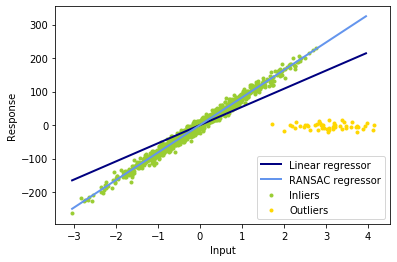

In [7]:
lw = 2

doing_linear = True
doing_ransac = True

if (doing_linear):
    plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')

if (doing_ransac):
    plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.', label='Inliers')
    plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.', label='Outliers')
    plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw, label='RANSAC regressor')
else:
    plt.scatter(X, y, color='yellowgreen', marker='.', label='Data')
    
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()